In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

# Clean and Balance Data

In [4]:
df  = pd.read_csv('data/asian_indian_recipes.csv')

In [5]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


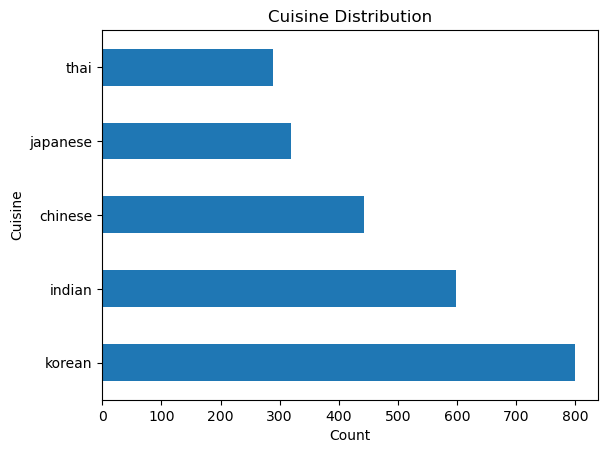

In [7]:
df.cuisine.value_counts().plot.barh()
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.title("Cuisine Distribution")
plt.show()

In [8]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [9]:
#Creates dataframe showing # of times each ingredient is used across all recipes
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine', 'Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


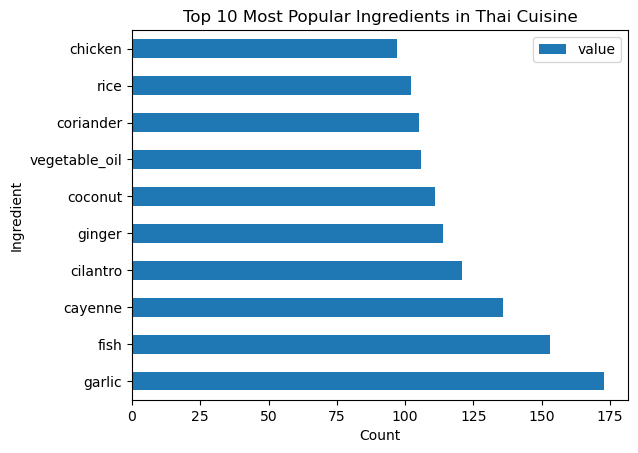

In [11]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.title("Top 10 Most Popular Ingredients in Thai Cuisine")
plt.show()

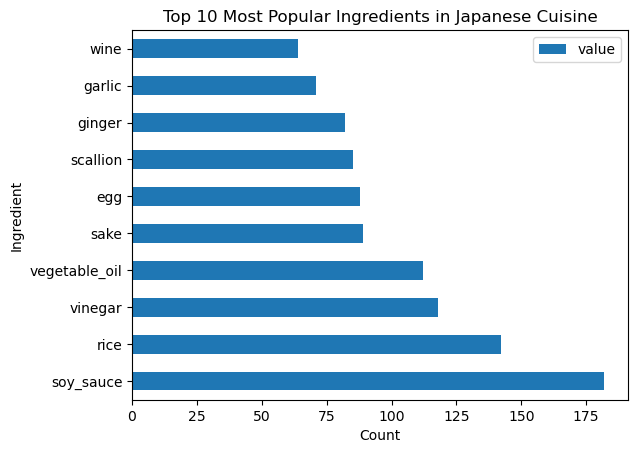

In [12]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.title("Top 10 Most Popular Ingredients in Japanese Cuisine")
plt.show()

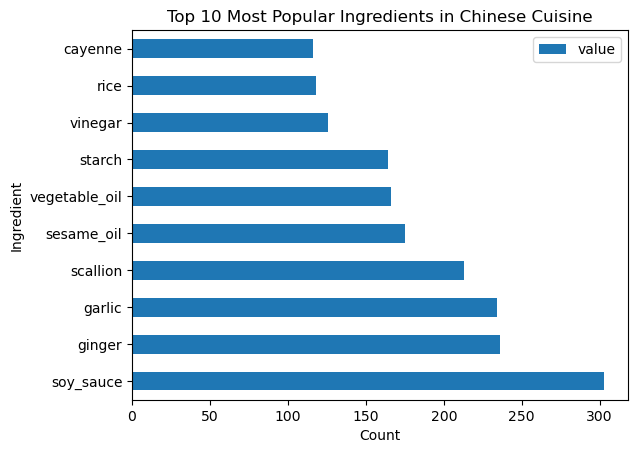

In [13]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.title("Top 10 Most Popular Ingredients in Chinese Cuisine")
plt.show()

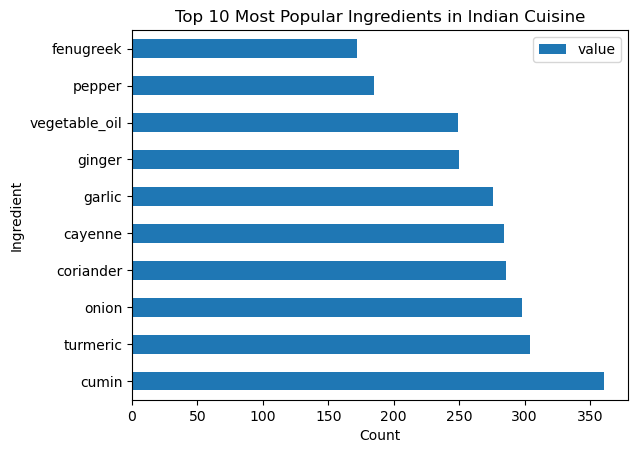

In [14]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.title("Top 10 Most Popular Ingredients in Indian Cuisine")
plt.show()

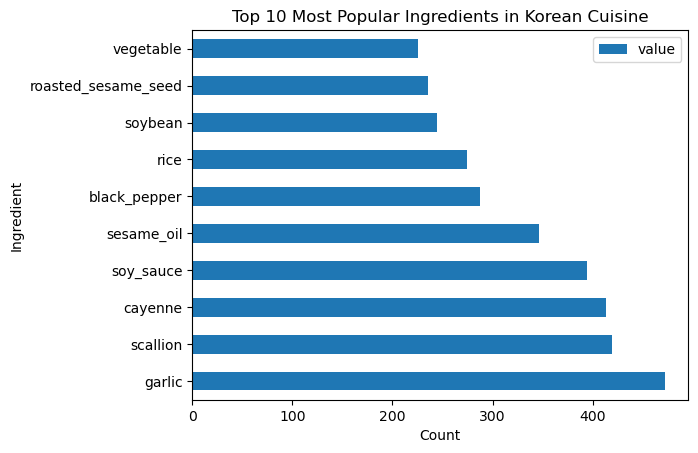

In [15]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.title("Top 10 Most Popular Ingredients in Korean Cuisine")
plt.show()

Ingredients in all cuisines' top 10: ['garlic']


NameError: name 'mpatches' is not defined

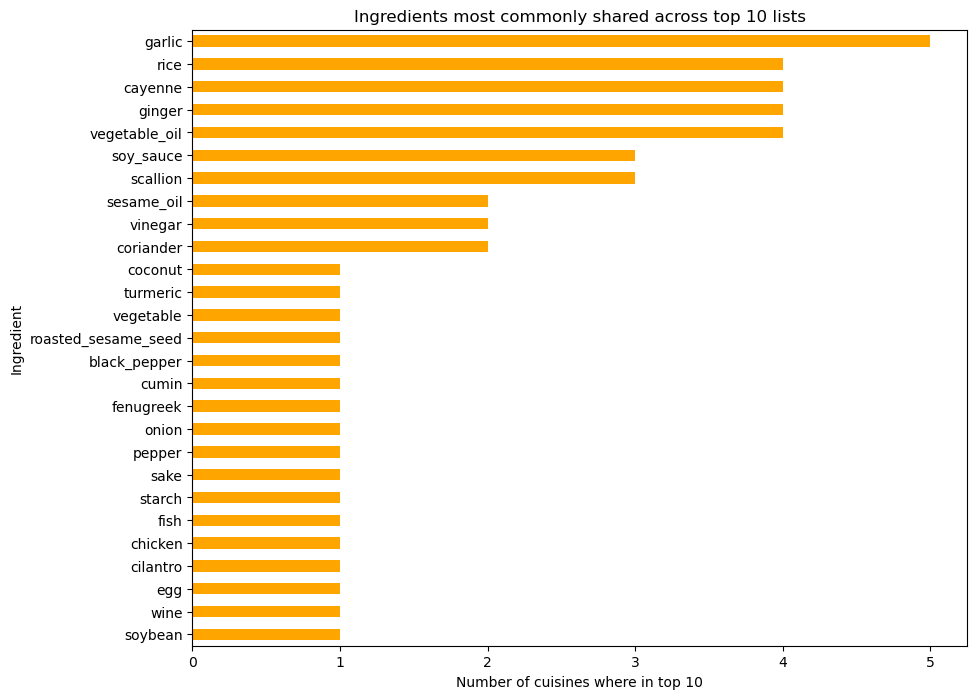

In [16]:
from collections import Counter


# Your list of DataFrames and titles (replace with yours)
dfs = [thai_df, japanese_df, chinese_df, indian_df, korean_df]
titles = ["Thai", "Japanese", "Chinese", "Indian", "Korean"]

# Get ingredient columns from the first DataFrame
ingredient_cols = dfs[0].drop(['cuisine', 'Unnamed: 0'], axis=1, errors='ignore').columns

# Compute top 10 ingredients per cuisine
top_ingredients_per_cuisine = []

for df_c in dfs:
    ingredient_df = create_ingredient_df(df_c)
    top_10 = set(ingredient_df.head(10).index)
    top_ingredients_per_cuisine.append(top_10)

# Flatten and count appearances across cuisines
all_top_ingredients = [ingredient for top in top_ingredients_per_cuisine for ingredient in top]
ingredient_counts = Counter(all_top_ingredients)

# Convert to DataFrame
ingredient_shared_df = pd.DataFrame.from_dict(ingredient_counts, orient='index', columns=['cuisine_count'])
ingredient_shared_df = ingredient_shared_df.sort_values(by='cuisine_count', ascending=False)

# Find ingredients present in ALL cuisines' top 10 lists
max_cuisine_count = len(dfs)
universal_ingredients = ingredient_shared_df[ingredient_shared_df['cuisine_count'] == max_cuisine_count].index
print("Ingredients in all cuisines' top 10:", list(universal_ingredients))

# Build color list
colors = [
    "orange" if ing in universal_ingredients else "skyblue"
    for ing in ingredient_shared_df.index
]

# Plot
ax = ingredient_shared_df.plot.barh(color=colors, figsize=(10, 8), legend=False)
ax.set_xlabel("Number of cuisines where in top 10")
ax.set_ylabel("Ingredient")
ax.set_title("Ingredients most commonly shared across top 10 lists")
ax.invert_yaxis()

# Add legend
universal_patch = mpatches.Patch(color='orange', label='Shared in all cuisines')
partial_patch = mpatches.Patch(color='skyblue', label='Shared in some cuisines')
plt.legend(handles=[universal_patch, partial_patch], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# List of unique cuisines
cuisines = df['cuisine'].unique()

# Empty list to hold results
garlic_counts = []

# Loop through each cuisine
for cuisine in cuisines:
    df_c = df[df['cuisine'] == cuisine]
    count = df_c['garlic'].sum()
    garlic_counts.append({'cuisine': cuisine, 'garlic_count': count})

# Create summary DataFrame
summary_df = pd.DataFrame(garlic_counts)

# Sort by count (optional)
summary_df = summary_df.sort_values(by='garlic_count', ascending=False).reset_index(drop=True)

# Display
print(summary_df)


In [ ]:

# Example: List of DataFrames and titles (replace with yours)
dfs = [thai_df, japanese_df, chinese_df, indian_df, korean_df]
titles = ["Thai", "Japanese", "Chinese", "Indian", "Korean"]

# Create 2 rows, 3 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Adjust figsize as needed

# Flatten the 2x3 array of axes for easy looping
axes = axes.flatten()

for ax, df_c, title in zip(axes, dfs, titles):
    ingredient_df = create_ingredient_df(df_c)
    ingredient_df.head(10).plot.barh(ax=ax)
    ax.set_title(f"Top 10 in {title} Cuisine")
    ax.set_xlabel("Count")
    ax.set_ylabel("Ingredient")
    ax.invert_yaxis()  # Optional: highest ingredient on top

axes[-1].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# ✅ List of unique cuisines
cuisines = df['cuisine'].unique()

# ✅ List of ingredients to analyze
ingredients = ['garlic', 'rice', 'cayenne', 'vegetable_oil', 'ginger']

# ✅ Empty list to hold results
counts = []

# ✅ Loop through each cuisine and each ingredient
for cuisine in cuisines:
    df_c = df[df['cuisine'] == cuisine]
    row = {'cuisine': cuisine}
    for ing in ingredients:
        if ing in df_c.columns:
            row[ing] = df_c[ing].sum()
        else:
            row[ing] = 0  # If ingredient not present, set to 0
    counts.append(row)

# ✅ Create summary DataFrame
summary_df = pd.DataFrame(counts)

# ✅ Optional: Sort by any ingredient, e.g., garlic
summary_df = summary_df.sort_values(by='garlic', ascending=False).reset_index(drop=True)

# ✅ Display
print(summary_df)


In [ ]:
feature_df= df.drop(['cuisine','Unnamed: 0','garlic', 'rice','cayenne', 'vegetable_oil','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

# Balance the dataset

In [ ]:
# SMOTE = "Synthetic Minority Over-sampling Technique"
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [ ]:
print(f'old label count: {df.cuisine.value_counts()}\n')
print(f'new label count: {transformed_label_df.value_counts()}')

In [ ]:
# Save balanced data into new dataframe
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

In [ ]:
# Export cleaned dataframe into csv
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("data/cleaned_cuisines.csv")